## quest 
- apply() : '신장', '체중' -> BMI
- BMI 시각화 및 인사이트 분석

### 분석결과 
- 현 데이터 환자의 신장과 체중을 통해 BMI수치를 계산하여 BMI분류 분석하였다.
- 데이터 분석 결과,환자들중  정상체중의 비율이 저체중과 비만에 비해 많음을 확인함
- 다만,  과체중의 비율이 400명 이상으로 적지는 않음을 확인함
- 비만에 관한 치료 또는 예방 교육을 현병원에서 실시한다면 수익 또는 병원이용률이 높아짐을 기대할수 있을 것 같음.

In [95]:
df_ROS[['신장','체중']][:2]

,신장,체중
0,163,60.3
1,171,71.7


In [108]:
df_ROS['체중']

0       60
1       71
2       77
3       74
4       80
        ..
1889    64
1890    59
1891    70
1892    77
1893    49
Name: 체중, Length: 1894, dtype: int32

In [93]:
df_ROS[['신장','체중']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   신장      1894 non-null   int64  
 1   체중      1894 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.7 KB


In [97]:
df_ROS['체중'] = df_ROS['체중'].astype(int)

In [103]:
df_ROS[['신장','체중']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   신장      1894 non-null   int64
 1   체중      1894 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 22.3 KB


In [112]:
## bmi 계산식 apply 함수에 적용

def cal_BMI (row):
    weight = row['체중']
    height = row['신장'] / 100  # 키를 cm에서 m로 변환
    bmi = weight/(height * height)
    return bmi

In [120]:
df_ROS['BMI_수치값']= df_ROS.apply(cal_BMI, axis=1)
df_ROS['BMI_수치값'][:2]

0    22.582709
1    24.280975
Name: BMI_수치값, dtype: float64

In [123]:
## bmi 분류 체계 apply()

def classify_obesity(bmi):
    if bmi < 18.5:
        return '저체중'
    elif bmi < 24.9:
        return '정상체중'
    elif bmi < 29.9:
        return '과체중'
    else:
        return '비만'

In [125]:
df_ROS['BMI_결과분류'] = df_ROS['BMI_수치값'].apply(classify_obesity)
df_ROS['BMI_결과분류'][:2]

0    정상체중
1    정상체중
Name: BMI_결과분류, dtype: object

#### bmi 시각화 
- 범주형/연속형 

<Axes: xlabel='BMI_결과분류'>

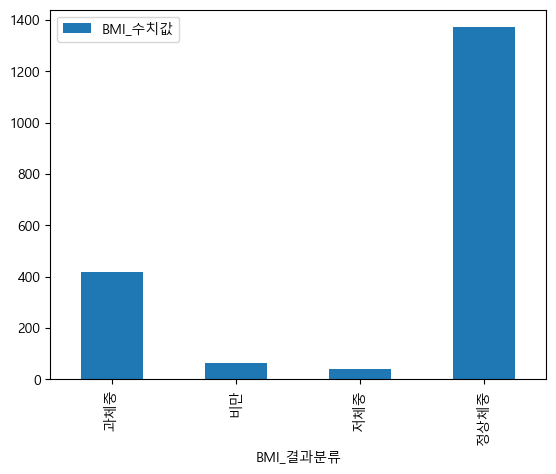

In [140]:
pd.pivot_table(data=df_ROS[['BMI_결과분류', 'BMI_수치값']], index='BMI_결과분류', aggfunc=len).plot(kind='bar')

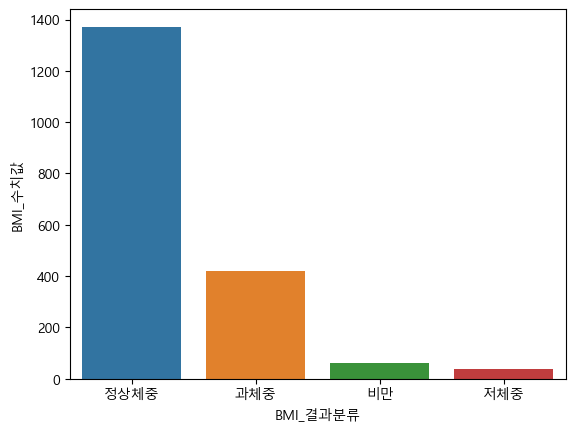

In [144]:
sns.barplot(data=df_ROS, x='BMI_결과분류', y='BMI_수치값', estimator=len )
plt.show()

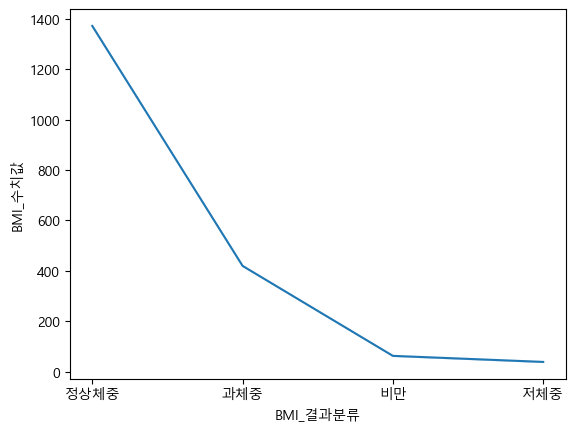

In [143]:
sns.lineplot(data=df_ROS, x='BMI_결과분류', y='BMI_수치값', estimator=len)
plt.show()